In [17]:
import ROOT as rt
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

In [2]:
#Open root file and get tree
rf = rt.TFile("run_4024.root","read")
evt_tree = rf.Get("ggpData")

In [3]:
def CFD(X, SCALE, DELAY):
    X_1 = X*(-SCALE)
    X_2 = np.roll(X,DELAY)
    array = (X_2+X_1)[DELAY:]
    min = np.argmin(array)
    for i in range(min,array.size):
        if array[i]>0:
            break
    
    return i


energies = []
data = []
risetime = []
Imax = []
x = 0

In [9]:
for i, evt in enumerate(evt_tree):
    if (evt.channel in [23,24,25]) & (x<10000) & (evt.energy>500) :
        energies.append(evt.energy)
        data.append((np.frombuffer(evt.samples, dtype = "f" )) - evt.baseline)
        risetime.append(evt.riseTime)
        Imax.append(np.amax(np.gradient(data[x])))
        #cfd =  CFD(data[x], 0.4,10) 
        #plt.plot(np.roll(data[x],10-cfd)[0:60])
        x +=1
      

(array([[2., 0., 4., ..., 2., 1., 2.],
        [0., 0., 2., ..., 0., 2., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([  3.  ,   5.04,   7.08,   9.12,  11.16,  13.2 ,  15.24,  17.28,
         19.32,  21.36,  23.4 ,  25.44,  27.48,  29.52,  31.56,  33.6 ,
         35.64,  37.68,  39.72,  41.76,  43.8 ,  45.84,  47.88,  49.92,
         51.96,  54.  ,  56.04,  58.08,  60.12,  62.16,  64.2 ,  66.24,
         68.28,  70.32,  72.36,  74.4 ,  76.44,  78.48,  80.52,  82.56,
         84.6 ,  86.64,  88.68,  90.72,  92.76,  94.8 ,  96.84,  98.88,
        100.92, 102.96, 105.  , 107.04, 109.08, 111.12, 113.16, 115.2 ,
        117.24, 119.28, 121.32, 123.36, 125.4 , 127.44, 129.48, 131.52,
        133.56, 135.6 , 137.64, 139.68, 141.72, 143.76, 145.8 , 147.84,
        149.88, 151.92, 153.96, 156.  , 158.04, 160.08, 162.12, 164.16,
        166.2 , 168.24, 170.28,

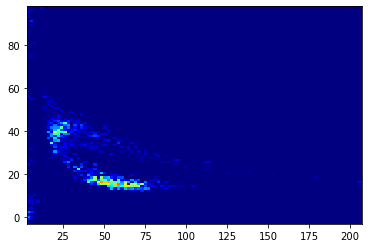

In [18]:
plt.hist2d(Imax, risetime, bins=(100, 100), cmap=plt.cm.jet)

(array([ 38., 664., 369., 225., 422.,  38.,   2.,   2.,   4.,  17.]),
 array([-3. ,  7.1, 17.2, 27.3, 37.4, 47.5, 57.6, 67.7, 77.8, 87.9, 98. ]),
 <a list of 10 Patch objects>)

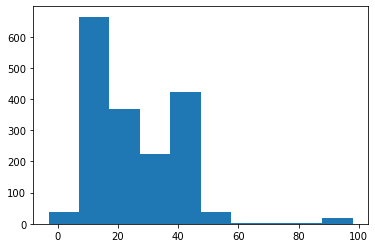

In [16]:
plt.hist(risetime)